# Transfer Learning

This project explores transfer learning, a common use case in deep learning. We'll download a pre-trained model using the "https://docs.fast.ai/tutorial.vision.html" tutorial from the Fastai website (https://docs.fast.ai/tutorial.vision.html) and adapt it to the Oxford-IIIT Pet Dataset (https://www.robots.ox.ac.uk/~vgg/data/pets/).

In general both transfer learning methods follow the same few steps:

- Initialize the pretrained model
- Reshape the final layer(s) to have the same number of outputs as the number of classes in the new dataset
- Define for the optimization algorithm which parameters we want to update during training
- Run the training step

In [2]:
from fastai.vision.all import *

In [15]:
image_path = "Dataset/images"

We start by grabbing the image files

In [16]:
files = get_image_files(image_path)
len(files)

7390

There is an easy way to distinguish between cats and dogs: the name of the file begins with a capital for cats, and a lowercased letter for dogs:

In [17]:
files[0],files[200]

(Path('Dataset/images/images/Abyssinian_1.jpg'),
 Path('Dataset/images/images/american_bulldog_10.jpg'))

We define the label function:

In [18]:
def label_func(f): return f[0].isupper()

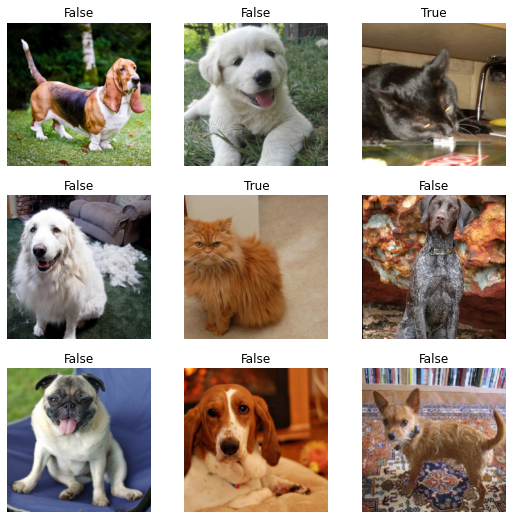

In [21]:
dls = ImageDataLoaders.from_name_func(image_path, files, label_func, item_tfms=Resize(224))
dls.show_batch()

In [22]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\ronan/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.148032,0.033415,0.006089,12:22


epoch,train_loss,valid_loss,error_rate,time
0,0.055771,0.041878,0.007442,15:22


# Classifying breeds

In [23]:
files[0].name

'Abyssinian_1.jpg'

The class is everything before the last _ followed by some digits. A regular expression that will catch the name is thus:

In [24]:
pat = r'^(.*)_\d+.jpg'

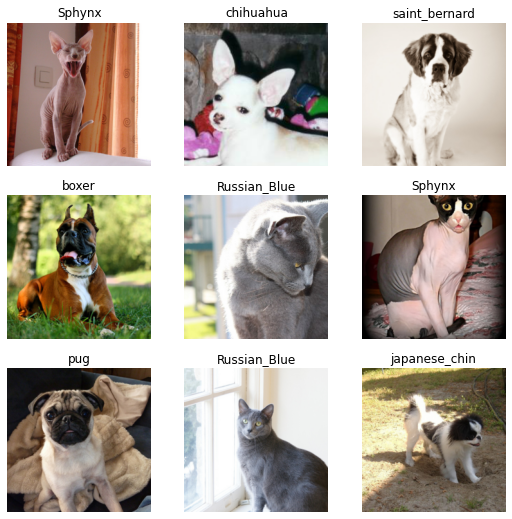

In [26]:
dls = ImageDataLoaders.from_name_re(image_path, files, pat, item_tfms=Resize(224))
dls.show_batch()

Since classifying the exact breed of cats or dogs amongst 37 different breeds is a harder problem, we will slightly change the definition of our DataLoaders to use data augmentation:

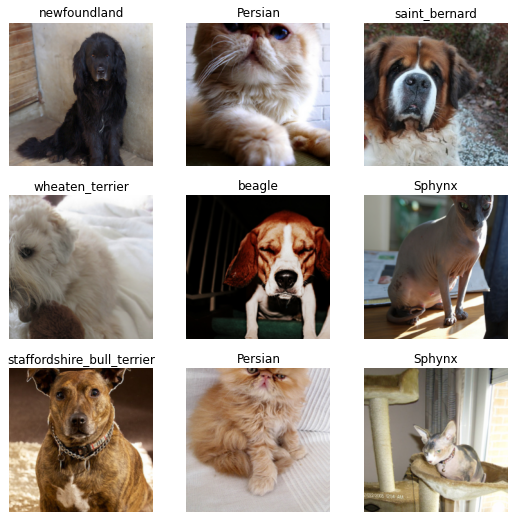

In [28]:
dls = ImageDataLoaders.from_name_re(image_path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

It plots the graph of the learning rate finder and gives us two suggestions (minimum divided by 10 and steepest gradient). Let’s use 3e-3 here. We will also do a bit more epochs:

In [ ]:
learn.fine_tune(2, 3e-3)

In [ ]:
learn.show_results()